(bifactor-notebook)=
# Modello bifattoriale 

L'obiettivo di questo capitolo è di presentare un'introduzione ai modelli bifattoriali che stanno trovando sempre più applicazioni nelle misure di personalità e psicopatologia. 

In [1]:
source("../_common.R")
suppressPackageStartupMessages({
    library("psych")
    library("lavaan")
    library("BifactorIndicesCalculator")
    library("semPlot")
})

Numerose misure psicologiche sono progettate principalmente per valutare gli individui su un singolo costrutto. Tuttavia, le complesse caratteristiche psicologiche, come la depressione e l'ansia, frequentemente si manifestano in modi diversificati. Questa varietà di manifestazioni suggerisce l'inclusione di item provenienti da diverse sfere di contenuto all'interno delle rispettive misurazioni, con l'obiettivo di garantire una adeguata validità di contenuto. Di conseguenza, molte delle scale di valutazione ampiamente utilizzate generano dati che possono essere interpretati in modo congruente sia con un modello unidimensionale (caratterizzato da un forte fattore generale) che con un modello multidimensionale (comprendente due o più fattori correlati).

## Struttura fattoriale

Recentemente, diversi studiosi hanno sostenuto che, quando ci si confronta con misurazioni che generano dati multidimensionali a causa di una struttura di contenuto diversificata, l'impiego di un modello di misurazione bifattoriale potrebbe offrire un approccio particolarmente efficace per rappresentare la struttura sottostante. Tale modello postula che, per un insieme di risposte agli item di un test, le correlazioni tra tali item possano essere interpretate attraverso due fattori distinti: (a) un fattore generale che cattura la varianza condivisa tra tutti gli item e (b) una serie di fattori di gruppo in cui la varianza non spiegata dal fattore generale è condivisa tra sottoinsiemi di item che si presuppone siano molto simili nei contenuti. Inoltre, è ampiamente accettato che il fattore generale e i fattori di gruppo siano indipendenti tra di loro. Il fattore generale rappresenta il costrutto centrale ampio che lo strumento intende misurare, mentre i fattori di gruppo rappresentano costrutti di sottodomini più specifici. Da un punto di vista sostanziale, i modelli bifattoriali sono stati principalmente utilizzati per: 

- esaminare la suddivisione della varianza quando si ritiene che uno strumento valuti sia fonti di varianza generali che di gruppo, 
- controllare la multidimensionalità, in modo che la misura sia "essenzialmente unidimensionale", ma con dimensioni di disturbo, 
- valutare se i dati abbiano un fattore generale sufficientemente forte da giustificare un modello di misurazione unidimensionale, 
- determinare l'adeguatezza di un punteggio totale e cosa, eventualmente, si possa ottenere valutando le sottoscale specifiche.


## Un esempio pratico

Consideriamo i dati `SRS_data` forniti dal pacchetto `BifactorIndicesCalculator`. Il dataset contiene 500 risposte al test SRS-22r sulla qualità della vita legata alla scoliosi, composta da 20 item. La sottoscala "Function" è composta dagli item 5, 9, 12, 15 e 18. La sottoscala "Pain" è composta dagli item 1, 2, 8, 11 e 17. La sottoscala "SelfImage" è composta dagli item 4, 6, 10, 14 e 19. La sottoscala "MentalHealth" è composta dagli item 3, 7, 13, 16 e 20.

Iniziamo esaminando le statistiche descrittive a livello di item e le correlazioni tra gli item.

In [2]:
describe(SRS_data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SRS_1,1,500,3.694,1.0651917,4,3.7775,1.4826,1,5,4,-0.55091527,-0.44128777,0.04763682
SRS_2,2,500,3.810,1.0295727,4,3.9200,1.4826,1,5,4,-0.71482596,-0.06788341,0.04604389
SRS_3,3,500,3.896,1.0897519,4,4.0375,1.4826,1,5,4,-0.83228535,-0.03970322,0.04873518
SRS_4,4,500,3.232,1.2796292,3,3.2900,1.4826,1,5,4,-0.10588960,-1.02358475,0.05722676
SRS_5,5,500,4.196,0.8939700,4,4.2975,1.4826,2,5,3,-0.74534622,-0.53845331,0.03997955
SRS_6,6,500,3.914,0.8718510,4,3.9525,1.4826,1,5,4,-0.37669898,-0.38588958,0.03899036
SRS_7,7,500,4.236,1.0111126,5,4.4025,0.0000,1,5,4,-1.28422859,1.08068127,0.04521833
SRS_8,8,500,3.796,1.1317888,4,3.9075,1.4826,1,5,4,-0.51397419,-0.69930792,0.05061513
SRS_9,9,500,4.408,1.0037685,5,4.6275,0.0000,1,5,4,-1.77060059,2.45174385,0.04488989


In [3]:
round(cor(SRS_data, use = "pairwise.complete.obs"), 2)

,SRS_1,SRS_2,SRS_3,SRS_4,SRS_5,SRS_6,SRS_7,SRS_8,SRS_9,SRS_10,SRS_11,SRS_12,SRS_13,SRS_14,SRS_15,SRS_16,SRS_17,SRS_18,SRS_19,SRS_20
SRS_1,1.00,0.88,0.43,0.36,0.36,0.39,0.34,0.70,0.31,0.37,0.46,0.59,0.37,0.36,0.19,0.40,0.38,0.30,0.27,0.33
SRS_2,0.88,1.00,0.40,0.38,0.35,0.42,0.35,0.70,0.34,0.40,0.49,0.58,0.35,0.38,0.20,0.37,0.39,0.29,0.31,0.32
SRS_3,0.43,0.40,1.00,0.32,0.33,0.39,0.50,0.46,0.30,0.32,0.24,0.46,0.55,0.34,0.19,0.55,0.25,0.25,0.28,0.41
SRS_4,0.36,0.38,0.32,1.00,0.23,0.43,0.32,0.33,0.19,0.43,0.20,0.30,0.30,0.20,0.23,0.32,0.10,0.21,0.54,0.32
SRS_5,0.36,0.35,0.33,0.23,1.00,0.33,0.39,0.33,0.47,0.34,0.23,0.52,0.31,0.29,0.20,0.42,0.28,0.31,0.25,0.40
SRS_6,0.39,0.42,0.39,0.43,0.33,1.00,0.48,0.37,0.25,0.64,0.28,0.37,0.41,0.38,0.22,0.47,0.22,0.31,0.62,0.41
SRS_7,0.34,0.35,0.50,0.32,0.39,0.48,1.00,0.40,0.24,0.37,0.22,0.42,0.53,0.44,0.23,0.78,0.19,0.39,0.39,0.56
SRS_8,0.70,0.70,0.46,0.33,0.33,0.37,0.40,1.00,0.30,0.37,0.36,0.52,0.40,0.28,0.14,0.42,0.31,0.32,0.28,0.34
SRS_9,0.31,0.34,0.30,0.19,0.47,0.25,0.24,0.30,1.00,0.36,0.26,0.49,0.32,0.29,0.22,0.32,0.35,0.27,0.20,0.31
SRS_10,0.37,0.40,0.32,0.43,0.34,0.64,0.37,0.37,0.36,1.00,0.26,0.37,0.30,0.34,0.22,0.39,0.19,0.28,0.54,0.35


In [4]:
SRS_UnidimensionalModel <-
"
    SRS =~ SRS_1 + SRS_2 + SRS_3 + SRS_4 + SRS_5 +
    SRS_6 + SRS_7 + SRS_8 + SRS_9 + SRS_10 +
    SRS_11 + SRS_12 + SRS_13 + SRS_14 + SRS_15 +
    SRS_16 + SRS_17 + SRS_18 + SRS_19 + SRS_20
"

SRS_Unidimensional <- lavaan::cfa(SRS_UnidimensionalModel,
    SRS_data,
    ordered = paste0("SRS_", 1:20),
    orthogonal = TRUE
)

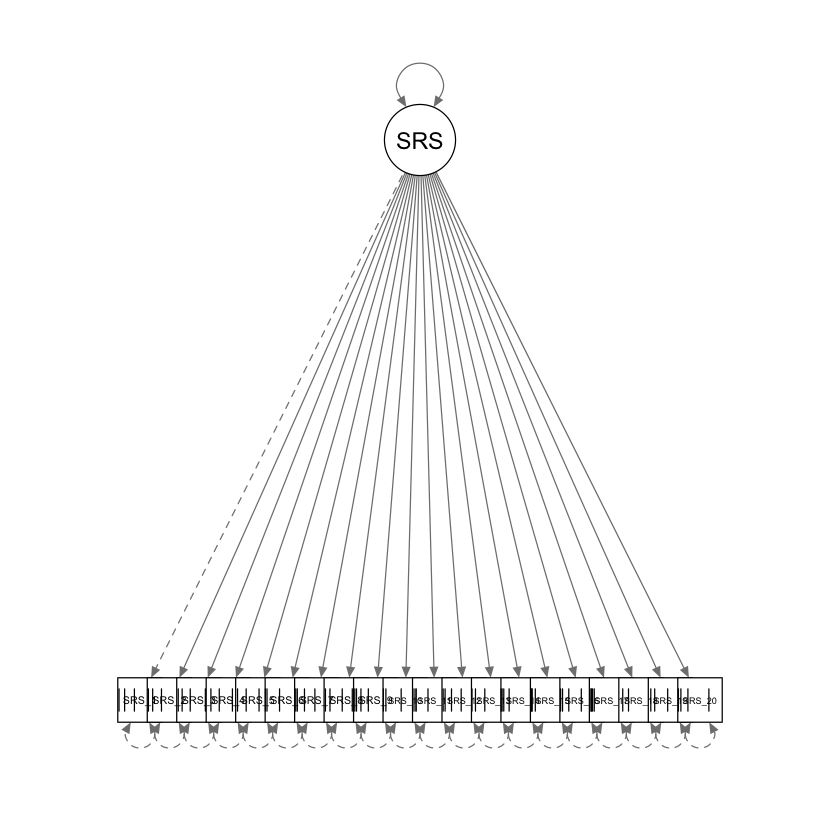

In [5]:
semPaths(SRS_Unidimensional, intercepts = FALSE)

Esaminiamo la bontà di adattamento.

In [6]:
fit.subset <- c(
    "chisq.scaled", "df", "pvalue.scaled",
    "rmsea.scaled", "rmsea.pvalue.scale",
    "rmsea.ci.lower.scaled", "rmsea.ci.upper.scaled",
    "cfi", "tli", "srmr"
)

In [7]:
fitmeasures(SRS_Unidimensional, fit.subset) |> print()

         chisq.scaled                    df         pvalue.scaled 
             2087.431               170.000                 0.000 
         rmsea.scaled rmsea.ci.lower.scaled rmsea.ci.upper.scaled 
                0.150                 0.145                 0.156 
                  cfi                   tli                  srmr 
                0.961                 0.956                 0.119 


In [8]:
SRS_BifactorModel <-
"
    SRS =~ SRS_1 + SRS_2 + SRS_3 + SRS_4 + SRS_5 +
    SRS_6 + SRS_7 + SRS_8 + SRS_9 + SRS_10 +
    SRS_11 + SRS_12 + SRS_13 + SRS_14 + SRS_15 +
    SRS_16 + SRS_17 + SRS_18 + SRS_19 + SRS_20
    Function =~ SRS_5 + SRS_9 + SRS_12 + SRS_15 + SRS_18
    Pain =~ SRS_1 + SRS_2 + SRS_8 + SRS_11 + SRS_17
    SelfImage =~ SRS_4 + SRS_6 + SRS_10 + SRS_14 + SRS_19
    MentalHealth =~ SRS_3 + SRS_7 + SRS_13 + SRS_16 + SRS_20
"

SRS_bifactor <- lavaan::cfa(SRS_BifactorModel,
    SRS_data,
    ordered = paste0("SRS_", 1:20),
    orthogonal = TRUE
)

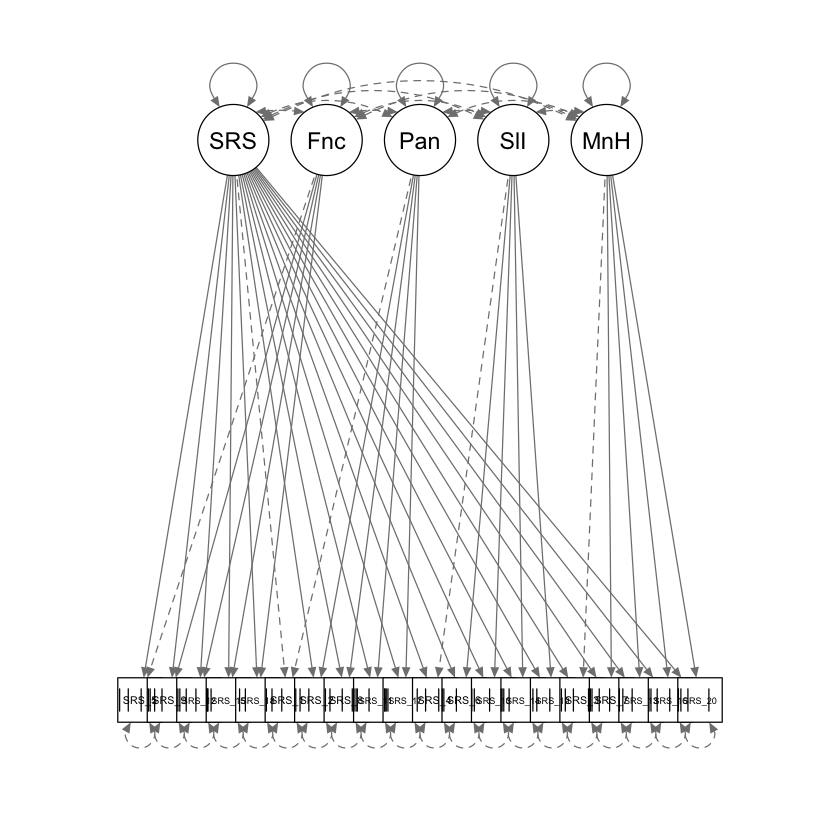

In [9]:
semPaths(SRS_bifactor, intercepts = FALSE)

Esaminiamo la bontà di adattamento.

In [10]:
fitmeasures(SRS_bifactor, fit.subset) |> print()

         chisq.scaled                    df         pvalue.scaled 
              468.648               150.000                 0.000 
         rmsea.scaled rmsea.ci.lower.scaled rmsea.ci.upper.scaled 
                0.065                 0.059                 0.072 
                  cfi                   tli                  srmr 
                0.997                 0.996                 0.055 


Confrontiamo i due modelli.

In [11]:
lavTestLRT(SRS_Unidimensional, SRS_bifactor) |> print()


Scaled Chi-Squared Difference Test (method = “satorra.2000”)

lavaan NOTE:
    The “Chisq” column contains standard test statistics, not the
    robust test that should be reported per model. A robust difference
    test is a function of two standard (not robust) statistics.
 
                    Df AIC BIC   Chisq Chisq diff Df diff Pr(>Chisq)    
SRS_bifactor       150          308.88                                  
SRS_Unidimensional 170         1965.48     1007.2      20  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Consideriamo ora gli indici specifici per un modello bifattoriale.

In [12]:
bifactorIndices(SRS_bifactor, UniLambda = SRS_Unidimensional) |> print()

$ModelLevelIndices
   ECV.SRS        PUC  Omega.SRS OmegaH.SRS       ARPB 
 0.6728130  0.7894737  0.9423975  0.8338190  0.1209687 

$FactorLevelIndices
                ECV_SS     ECV_SG    ECV_GS     Omega     OmegaH         H
SRS          0.6728130 0.67281304 0.6728130 0.9423975 0.83381903 0.9431669
Function     0.1972990 0.04153902 0.8027010 0.7993085 0.09117569 0.4033325
Pain         0.4123779 0.11147096 0.5876221 0.8817340 0.34266587 0.6964443
SelfImage    0.3280132 0.08183383 0.6719868 0.8502075 0.20252347 0.5913544
MentalHealth 0.3424358 0.09234316 0.6575642 0.8917832 0.29303417 0.6148062
                    FD
SRS          0.9522166
Function     0.7096945
Pain         0.9209793
SelfImage    0.8297680
MentalHealth 0.8543576

$ItemLevelIndices
            IECV RelParBias
SRS_1  0.5104022 0.35337989
SRS_2  0.4976737 0.36753928
SRS_3  0.7980893 0.03658299
SRS_4  0.6115286 0.05215982
SRS_5  0.6353618 0.02256623
SRS_6  0.6366985 0.08805912
SRS_7  0.6318472 0.17893361
SRS_8  0.6819609 

I `ModelLevelIndices` possono essere spiegati nel modo seguente:

1. ECV.SRS: Questo indica la proporzione di varianza spiegata dal fattore generale nel modello bifattoriale. ECV sta per "Explained Common Variance" (Varianza Comune Spiegata). Un valore più alto indica che una maggiore parte della varianza totale nei dati è spiegata dal fattore generale.

2. PUC: Questo è l'acronimo di "Percentage of Uniqueness in Common" (Percentuale di Unicità nel Comune). Indica quanto della varianza unica (cioè quella non spiegata dal fattore generale) è presente nei fattori di gruppo. Un valore basso indica che i fattori di gruppo spiegano una maggiore parte della varianza unica nei dati.

3. Omega.SRS: Questo indice rappresenta il coefficiente di affidabilità del fattore generale del modello bifattoriale. Indica quanto sia affidabile il fattore generale nel catturare la varianza comune tra tutti gli item del test. Un valore più alto indica maggiore affidabilità.

4. OmegaH.SRS: Questo indice rappresenta il coefficiente di affidabilità dei fattori di gruppo nel modello bifattoriale. Indica quanto sia affidabile l'insieme dei fattori di gruppo nel catturare la varianza condivisa tra gli item del gruppo specifico. Anche qui, un valore più alto indica maggiore affidabilità.

5. ARPB: Questo sta per "Average Reproducibility of Parameter Estimates" (Riproducibilità Media delle Stime dei Parametri). Rappresenta la riproducibilità media delle stime dei parametri del modello bifattoriale. In sostanza, valuta quanto le stime dei parametri del modello sono affidabili e riproducibili.

La sezione dell'output `FactorLevelIndices` riguarda gli indici a livello di fattore del modello bifattoriale. 

1. ECV_SS, ECV_SG, ECV_GS: Questi rappresentano rispettivamente la proporzione di varianza spiegata dal Fattore Generale (GG), dal Fattore Specifico (SS) e dall'Interazione tra Fattore Generale e Fattore Specifico (GS) per ciascun fattore. Indicano quanto ciascun tipo di varianza contribuisce alla spiegazione della varianza totale nell'insieme dei dati del fattore.

2. Omega: Questo indice rappresenta il coefficiente di affidabilità dell'estratto del Fattore Generale per ciascun fattore. Indica quanto sia affidabile il Fattore Generale nel catturare la varianza comune tra gli item di quel particolare fattore. Un valore più alto indica maggiore affidabilità.

3. OmegaH: Questo indice rappresenta il coefficiente di affidabilità dell'estratto del Fattore Specifico per ciascun fattore. Indica quanto sia affidabile l'insieme dei Fattori Specifici nel catturare la varianza condivisa tra gli item del gruppo specifico. Anche qui, un valore più alto indica maggiore affidabilità.

4. H: Questo indice rappresenta la quota della varianza unica spiegata dal Fattore Generale per ciascun fattore. Indica quanto della varianza unica è spiegata dal Fattore Generale piuttosto che da fattori specifici.

5. FD: Questo indice rappresenta la distorsione fattoriale, che è una misura di quanto i dati si adattino bene al modello bifattoriale. Valori vicini a 1 indicano un buon adattamento.

Infine, l'output `ItemLevelIndices` riguarda gli indici a livello di item in un modello bifattoriale. 

1. IECV: Questo indica la proporzione di varianza spiegata dal Fattore Generale per ciascun item. IECV sta per "Item Explained Common Variance" (Varianza Comune Spiegata dell'Item). Indica quanto della varianza totale dell'item può essere spiegata dal Fattore Generale del modello bifattoriale. Valori più alti indicano che il Fattore Generale contribuisce maggiormente a spiegare le variazioni osservate nell'item.

2. RelParBias: Questo rappresenta il bias relativo dei parametri dell'item. Indica quanto i parametri dell'item sono influenzati dalla presenza del Fattore Generale e dai fattori specifici nel modello. Valori più alti indicano una maggiore influenza dei fattori specifici rispetto al Fattore Generale nell'item.

## Commenti e considerazioni conclusive

In questo capitolo abbiamo presentato una serie di indici derivabili dai risultati di un modello bifattoriale; ciascuno di essi fornisce informazioni su diversi aspetti delle proprietà psicometriche dello strumento. Questi indici offrono un notevole potenziale per assistere gli sviluppatori e i valutatori delle scale, nonché coloro che utilizzano tali scale nella ricerca e nella pratica clinica. Inoltre, hanno il potenziale per contribuire anche allo sviluppo e alla comprensione del costrutto.


## Session Info

In [13]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Sonoma 14.4.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] C/UTF-8/C/C/C/C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] BifactorIndicesCalculator_0.2.2 ggokabeito_0.1.0               
 [3] viridis_0.6.5                   viridisLite_0.4.2              
 [5] ggpubr_0.6.0                    ggExtra_0.10.1                 
 [7] bayesplot_1.11.1                gridExtra_2.3                  
 [9] patchwork_1.2.0                 semTools_0.5-6                 
[11] semPlot_1.1.6                   lavaan_0.6-17                  
[13] psych_2.4.3                     scales_1.3